In [9]:
# Imports
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import pandas as pd
from GenomeSigInfer.vcf import VCFMatrixGenerator
from GenomeSigInfer.utils.helpers import COLOR_DICT_MUTATION
from GenomeSigInfer.matrix import matrix_operations

In [2]:
vcf_files = ["../../data/vcf/WES_Other.20180327.simple", "../../data/vcf/WGS_Other.20180413.simple"]
genome = "GRCh37"
dfs = [pd.read_csv(Path(vcf_file), sep="\t", header=None) for vcf_file in vcf_files]
vcf_concat = pd.concat(dfs, ignore_index=True)

C:\Users\John\AppData\Local\Temp\ipykernel_22172\3278157121.py:3: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(Path(vcf_file), sep="\t", header=None) for vcf_file in vcf_files]


In [3]:
vcf_concat

,0,1,2,3,4,5,6,7,8,9,10
0,Adrenal-neoplasm,APA12,PMID:21311022,GRCh38,SNP,11,128911724,128911724,G,A,WES:SOMATIC; dbSNP v147
1,Adrenal-neoplasm,APA12,PMID:21311022,GRCh38,SNP,11,86952394,86952394,G,T,WES:SOMATIC; dbSNP v147
2,Adrenal-neoplasm,APA12,PMID:21311022,GRCh38,SNP,12,57479211,57479211,C,T,WES:SOMATIC; dbSNP v147
3,Adrenal-neoplasm,APA12,PMID:21311022,GRCh38,SNP,12,76384283,76384283,G,T,WES:SOMATIC; dbSNP v147
4,Adrenal-neoplasm,APA12,PMID:21311022,GRCh38,SNP,1,7801162,7801162,A,C,WES:SOMATIC
...,...,...,...,...,...,...,...,...,...,...,...
30356414,Stomach-AdenoCa,pfg424T,doi:10.1038/ng.2983,hg19,SNV,X,99004059,99004059,G,T,WGS:SOMATIC
30356415,Stomach-AdenoCa,pfg424T,doi:10.1038/ng.2983,hg19,SNV,X,99114829,99114829,G,A,WGS:SOMATIC
30356416,Stomach-AdenoCa,pfg424T,doi:10.1038/ng.2983,hg19,SNV,X,99254762,99254762,C,T,WGS:SOMATIC
30356417,Stomach-AdenoCa,pfg424T,doi:10.1038/ng.2983,hg19,SNV,X,99412891,99412891,A,C,WGS:SOMATIC


In [4]:
filtered_vcf = VCFMatrixGenerator.filter_vcf_files(vcf_files, genome)

2024-01-13 14:23:40 - INFO - Created a large VCF containing 13093659 mutations


In [5]:
filtered_vcf

,0,1,2,3,4,5,6,7,8,9,10
0,ALL,SJTALL001,doi:10.1038/nature10725,GRCh37,SNP,10,59986857,59986857,C,T,SOMATIC:Whole exome
1,ALL,SJTALL001,doi:10.1038/nature10725,GRCh37,SNP,1,115256528,115256528,T,G,SOMATIC:Whole exome; dbSNP v147
2,ALL,SJTALL001,doi:10.1038/nature10725,GRCh37,SNP,11,78279756,78279756,C,A,SOMATIC:Whole exome
3,ALL,SJTALL001,doi:10.1038/nature10725,GRCh37,SNP,14,75483861,75483861,C,T,SOMATIC:Whole exome
4,ALL,SJTALL001,doi:10.1038/nature10725,GRCh37,SNP,20,62655940,62655940,T,C,SOMATIC:Whole exome
...,...,...,...,...,...,...,...,...,...,...,...
13093654,Skin-Melanoma,ML_99_T_01,ICGC:SKCA-BR,GRCh37,SNP,X,97989653,97989653,T,C,SOMATIC
13093655,Skin-Melanoma,ML_99_T_01,ICGC:SKCA-BR,GRCh37,SNP,X,9850756,9850756,T,G,SOMATIC
13093656,Skin-Melanoma,ML_99_T_01,ICGC:SKCA-BR,GRCh37,SNP,X,98550250,98550250,C,T,SOMATIC
13093657,Skin-Melanoma,ML_99_T_01,ICGC:SKCA-BR,GRCh37,SNP,X,98815785,98815785,C,T,SOMATIC


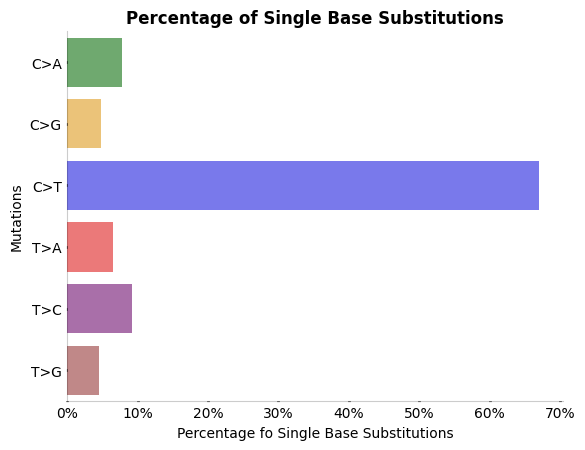

In [6]:
count_df = pd.DataFrame((filtered_vcf.iloc[:, 8] + ">" +  filtered_vcf.iloc[:, 9]).value_counts()).sort_index()
count_df["Percentage"] = count_df[0] / count_df[0].sum() * 100
names = count_df.index.to_list()
values = count_df["Percentage"].to_list()
ax = sns.barplot(
    y=names,
    x=values,
    orient="h",
    hue=names,
    palette=list(COLOR_DICT_MUTATION.values()),
    legend=False,
    alpha=0.6,
    linewidth=0,
)
plt.xlabel("Percentage fo Single Base Substitutions")
plt.ylabel("Mutations")
plt.title(f"Percentage of Single Base Substitutions", fontweight="bold")
ax.spines['top'].set_alpha(0)
ax.spines['bottom'].set_alpha(0.2)
ax.spines['right'].set_alpha(0)
ax.spines['left'].set_alpha(0.2)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}%"))
ax.tick_params(axis='both', which='both', color=(0, 0, 0, 1), length=0.4, width=2)
plt.show()

In [7]:
count_df

,0,Percentage
C>A,1022589,7.809803
C>G,638923,4.879637
C>T,8783460,67.081784
T>A,857121,6.546077
T>C,1198232,9.151239
T>G,593334,4.531461


In [11]:
matrix_operations.create_mutation_samples_df(
    filtered_vcf, 7
).iloc[:5, [0, -3, -2, -1]]

,MutationType,Thy-AdenoCa::PTC-73C,Thy-AdenoCa::PTC-7C,Thy-AdenoCa::PTC-88C
0,AAA[C>A]AAA,0.0,0.0,0.0
1,AAA[C>A]AAC,0.0,0.0,0.0
2,AAA[C>A]AAG,0.0,0.0,0.0
3,AAA[C>A]AAT,0.0,0.0,0.0
4,AAA[C>A]ACA,0.0,0.0,0.0
